# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [36]:
# Your code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model

student_data = pd.DataFrame([[1,17,10],[2,51,1],[3,27,5],[4,21,9],[5,36,4],[6,48,2],[7,19,9],[8,26,6],[9,54,0],[10,30,3]],columns= ['StudentID','Age','Tardies'])
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

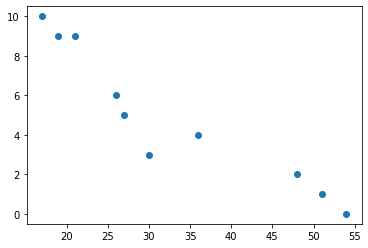

In [37]:
# Your code here.
plt.scatter(x=student_data['Age'],y=student_data['Tardies'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [38]:
# Your response here. 
#Yes, there is a negative tendency that comproves the initial theory of younger students being later to class than older ones.


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [39]:
# Your response here.
#correlation:
display(student_data.corr())
## Age and tardiness are strongly related negatively.

#covariance:
student_data.cov()
## When the calculated covariance is less than zero, this indicates that the two variables have an inverse relationship. 


,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


,StudentID,Age,Tardies
StudentID,9.166667,7.722222,-3.722222
Age,7.722222,187.655556,-45.566667
Tardies,-3.722222,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [40]:
# Your response here.
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

x = student_data[['Age']]
y = student_data['Tardies']

model = linear_model.LinearRegression()
result = model.fit(x,y)

## b0 --> intercept
display(result.intercept_)

## b1 --> slope
display(result.coef_[0])   # Indexing because without it the result is an array

regression_line = result.intercept_ + result.coef_[0]*x

## regression line = 12.88x - 0.2428

12.888803363135771

-0.2428207709159809

Plot your regression model on your scatter plot.

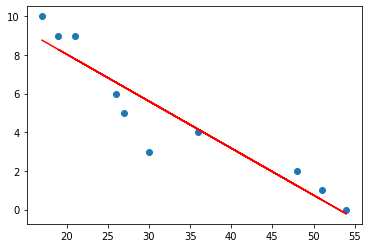

In [41]:
# Your code here.
plt.plot(x, regression_line, c='red')
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [42]:
# Your response here. 
result.score(x,y)

#From the R2 we can say that the model is very accurate with 0.88.

0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [43]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

<AxesSubplot:>

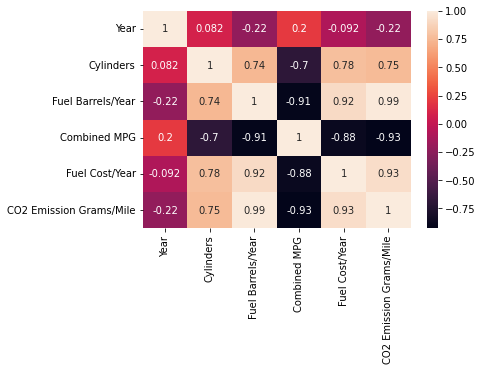

In [44]:
# Your response here. 
vehicles_df = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']].corr()
display(vehicles_df['CO2 Emission Grams/Mile'])

sns.heatmap(vehicles_df, annot= True)

## The variables most correlated to C02 EMISSIONS ARE THE FUEL bARRELS Year and Fuel Cost/year (directly related) and 
## the combined MPG which is inversely correlated.
##The variable Year is not considered to be correlated

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [45]:
# I'll use MULTILINEAR REGRESSION MODEL

X = vehicles_df[['Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles_df['CO2 Emission Grams/Mile']

model = linear_model.LinearRegression()
result = model.fit(X,y)

## R2 
model.score(X,y)

## From the r2 we can conclude that 
# the variables in X are directly correlated with the C02 Emissions

## Is 1.0 possible?

0.9998961288233086

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [46]:
print(result.intercept_) 
coeff_df = pd.DataFrame(result.coef_, X.columns, columns=['Coefficient'])  
coeff_df

## Not sure how to comment this...

-0.007579105229100658


,Coefficient
Cylinders,0.010104
Fuel Barrels/Year,0.907819
Combined MPG,-0.009803
Fuel Cost/Year,0.089668


In [ ]:
"""Got the following from a guy on github but not getting the same results:

1. This means that for a unit increase in 'Fuel Barrels/Year', there is an increase of 19.05 units in CO2 emissions.
2. Similarly, a unit increase in 'Cylinders' results in an increase of 1.87 units in CO2 emissions.
3. On the other hand, a unit increase in MPG results in a 3.04 units decrease in CO2 emissions.
4. We can see that the rest of the features have very little effect on CO2 emissions.
5. Confidence in these conclusions is high because the model score was 0.98!"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [54]:
# Your code here.
party = pd.DataFrame([[1,1],[3,2],[4,4],[6,4],[8,5],[9,7],[11,8],[14,13]], columns= ['Invite','Show'])
party

,Invite,Show
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

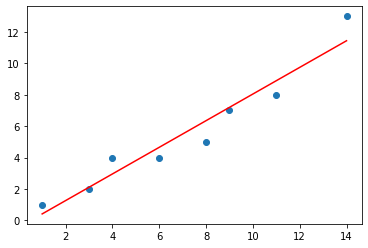

In [67]:
# Your code here.

x = party[['Invite']]
y = party['Show']

model = linear_model.LinearRegression()
result = model.fit(x,y)

## R2 
model.score(x,y)

plt.scatter(x,y)
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x,regression_line,c='red')
plt.show()


## From the r2 we can conclude that 
# the more invites the more people show

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [69]:
# It seems as though they are positively correlated and therefore the original 
## assumption seems to be wrong
r2=model.score(x,y)
r2

0.9316696375519905

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

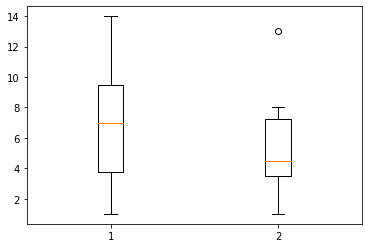

0.9433811802232855


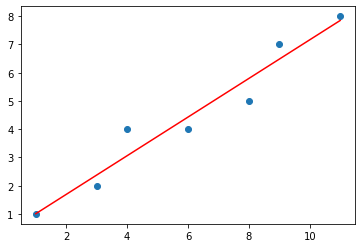

In [75]:
# Your response here. 
plt.boxplot(party)
plt.show()

#It seems there is one outlier being the 14 invitees and 13 shows.
party2 = pd.DataFrame([[1,1],[3,2],[4,4],[6,4],[8,5],[9,7],[11,8]], columns= ['Invite','Show'])
x2 = party2[['Invite']]
y2 = party2['Show']

model = linear_model.LinearRegression()
result = model.fit(x2,y2)

## R2 
print(model.score(x2,y2))

plt.scatter(x2,y2)
regression_line = result.intercept_ + result.coef_[0]*x2
plt.plot(x2,regression_line,c='red')
plt.show()


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [51]:
## In this case it did not change R2 all that much - only from 0.93 to 0.94
#In any case, removing the outlier improves the error margin r2